### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [76]:
# Dependencies and Setup
%matplotlib notebook
import scipy.stats as sts
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File to Load (Remember to Change These)
file_to_load = "Resources/purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)
purchase_data.count()

Purchase ID    780
SN             780
Age            780
Gender         780
Item ID        780
Item Name      780
Price          780
dtype: int64

## Player Count

* Display the total number of players


In [77]:
len(purchase_data.SN.unique())

576

## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [78]:
summary_df = pd.DataFrame({"Number of Unique Items":len(purchase_data["Item Name"].unique()), "Average Price":purchase_data["Price"].mean(),"Number of Purchases":len(purchase_data["Purchase ID"]),"Total Revenue":purchase_data["Price"].sum()},index = [0])
summary_df["Average Price"] = summary_df["Average Price"].map("${:.2f}".format)
summary_df["Total Revenue"] = summary_df["Total Revenue"].map("${:.2f}".format)
summary_df.head()

,Number of Unique Items,Average Price,Number of Purchases,Total Revenue
0,179,$3.05,780,$2379.77


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [79]:
gender_data_percent = purchase_data["Gender"].value_counts("Male") #this "male" argument i found entirely on accident
gender_data_count = purchase_data["Gender"].value_counts()
gender_data_percent = gender_data_percent.map('{:,.2%}'.format)
gender_data = pd.DataFrame([gender_data_count,gender_data_percent]).T
gender_data.columns = ["Count","Percent"]
gender_data

,Count,Percent
Male,652,83.59%
Female,113,14.49%
Other / Non-Disclosed,15,1.92%


In [80]:
purchase_data.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


In [81]:
sumPerUser = purchase_data.groupby("SN").sum()
sumPerUser.head()

,Purchase ID,Age,Item ID,Price
SN,,,,
Adairialis76,467,16,123,2.28
Adastirin33,142,35,175,4.48
Aeda94,388,17,128,4.91
Aela59,28,21,119,4.32
Aelaria33,630,23,171,1.79


In [82]:
uniqueUsers = purchase_data["SN"].unique()
uniqueUsers

array(['Lisim78', 'Lisovynya38', 'Ithergue48', 'Chamassasya86',
       'Iskosia90', 'Yalae81', 'Itheria73', 'Iskjaskst81', 'Undjask33',
       'Chanosian48', 'Inguron55', 'Haisrisuir60', 'Saelaephos52',
       'Assjaskan73', 'Saesrideu94', 'Lisassa64', 'Lisirra25',
       'Zontibe81', 'Reunasu60', 'Chamalo71', 'Iathenudil29',
       'Phiarithdeu40', 'Siarithria38', 'Eyrian71', 'Siala43',
       'Lisirra87', 'Lirtossa84', 'Eusri44', 'Aela59', 'Tyida79',
       'Idai61', 'Farusrian86', 'Aeralria27', 'Haillyrgue51', 'Sondim73',
       'Jeyciman68', 'Idaisuir85', 'Seuthep89', 'Reulae52',
       'Sondilsaya62', 'Aerithriaphos45', 'Assosia88', 'Aidaillodeu39',
       'Aelly27', 'Tyeosri53', 'Haerith37', 'Yasrisu92', 'Chanuchi25',
       'Asur96', 'Iaralrgue74', 'Chanosia34', 'Aelin32', 'Ilosianya35',
       'Zhisrisu83', 'Phaelap26', 'Raesty92', 'Palyon91', 'Tyisur83',
       'Yaliru88', 'Yadanu52', 'Jiskimya77', 'Yadaphos40', 'Alo38',
       'Phaena87', 'Chamirraya83', 'Chanastsda67', 'Indo

In [83]:
userGender = {}
for user in uniqueUsers:
    if user not in userGender:
        userGender[user] = purchase_data.loc[purchase_data["SN"] == user,"Gender"]
purchasesPerUser = {} #purchases per user is number of duplicates for each user, which this loop will test for
for key in userGender:
    purchasesPerUser[key] = len(userGender[key])
purchasesPerUser

{'Lisim78': 3,
 'Lisovynya38': 1,
 'Ithergue48': 1,
 'Chamassasya86': 1,
 'Iskosia90': 1,
 'Yalae81': 2,
 'Itheria73': 1,
 'Iskjaskst81': 2,
 'Undjask33': 1,
 'Chanosian48': 2,
 'Inguron55': 3,
 'Haisrisuir60': 2,
 'Saelaephos52': 2,
 'Assjaskan73': 1,
 'Saesrideu94': 2,
 'Lisassa64': 1,
 'Lisirra25': 1,
 'Zontibe81': 3,
 'Reunasu60': 2,
 'Chamalo71': 1,
 'Iathenudil29': 1,
 'Phiarithdeu40': 1,
 'Siarithria38': 2,
 'Eyrian71': 2,
 'Siala43': 2,
 'Lisirra87': 1,
 'Lirtossa84': 2,
 'Eusri44': 1,
 'Aela59': 1,
 'Tyida79': 2,
 'Idai61': 3,
 'Farusrian86': 1,
 'Aeralria27': 1,
 'Haillyrgue51': 3,
 'Sondim73': 1,
 'Jeyciman68': 1,
 'Idaisuir85': 1,
 'Seuthep89': 1,
 'Reulae52': 1,
 'Sondilsaya62': 1,
 'Aerithriaphos45': 1,
 'Assosia88': 1,
 'Aidaillodeu39': 2,
 'Aelly27': 2,
 'Tyeosri53': 2,
 'Haerith37': 1,
 'Yasrisu92': 1,
 'Chanuchi25': 1,
 'Asur96': 1,
 'Iaralrgue74': 2,
 'Chanosia34': 1,
 'Aelin32': 3,
 'Ilosianya35': 1,
 'Zhisrisu83': 2,
 'Phaelap26': 2,
 'Raesty92': 3,
 'Palyon91': 1,

In [84]:
genderPerUser = purchase_data.copy()
genderPerUser.drop_duplicates(subset="SN",keep="first",inplace=True)
genderPerUser.drop(columns=["Age","Item Name","Item ID","Purchase ID","Price"],inplace = True)
len(genderPerUser)
#genderPerUser.head()

576

In [85]:
#now we will user genderPerUser and purchasesPerUser to determine average total purchases per gender
#we will put this information into a new dictionary
userPurchasesGender ={}
for key in purchasesPerUser:
    userPurchasesGender[key] = [0," "]
    userPurchasesGender[key][0] = purchasesPerUser[key]
    userPurchasesGender[key][1] = genderPerUser.loc[genderPerUser["SN"]==key,"Gender"]
    if "Male" in str(userPurchasesGender[key][1]):
        userPurchasesGender[key][1] = "Male"
    elif "Female" in str(userPurchasesGender[key][1]):
        userPurchasesGender[key][1] = "Female"
    else:
        userPurchasesGender[key][1] = "Other / Non-Disclosed"
userPurchasesGender = pd.DataFrame.from_dict(userPurchasesGender,orient='index',columns=['Number of Purchases','Gender'])
userPurchasesGender.head()

,Number of Purchases,Gender
Lisim78,3,Male
Lisovynya38,1,Male
Ithergue48,1,Male
Chamassasya86,1,Male
Iskosia90,1,Male



## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [86]:
purchaseGroup = purchase_data.groupby(["Gender"])
genderSummary_df = gender_data.copy()
genderSummary_df["Purchase Count"] = purchase_data["Gender"].value_counts()
del genderSummary_df["Count"]
genderSummary_df["Average Purchase Price"] = purchase_data.groupby("Gender")["Price"].mean()
genderSummary_df["Average Purchase Price"] = genderSummary_df["Average Purchase Price"].map("${:.2f}".format)
average_df = userPurchasesGender.groupby("Gender").mean()
average_df.head()
genderSummary_df["Average Number of Purchases"] = average_df["Number of Purchases"]
genderSummary_df["Average Number of Purchases"] = genderSummary_df["Average Number of Purchases"].map("{:.2f}".format)
genderSummary_df.head()

,Percent,Purchase Count,Average Purchase Price,Average Number of Purchases
Male,83.59%,652,$3.02,1.35
Female,14.49%,113,$3.20,1.40
Other / Non-Disclosed,1.92%,15,$3.35,1.36


## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [87]:
#purchase_data.head(1)

In [109]:
bins = [0,10,15,20,25,30,35,40,41]
labels = ["<10","10-14","15-19","20-24","25-29","30-34","35-39","40<"]
purchase_data["age bins"] = pd.cut(purchase_data["Age"],bins,labels = labels, include_lowest = True)
ageGroup_df = purchase_data.groupby("age bins").count()
ageGroup_df.drop(columns=["Purchase ID","Gender","Item ID","Item Name","Price"], inplace = True)
uniqueUsers_df = pd.DataFrame(purchase_data.copy())
uniqueUsers_df.drop_duplicates("SN",inplace=True)
uniqueUsers_df.head(1)
ageGroup_df["SN"] = uniqueUsers_df.groupby("age bins").count()["SN"]
ageGroup_df.rename(columns = {"SN":"Users Per Age Group"},inplace = True)
ageGroup_df["Percent of Total Users"] = (ageGroup_df["Age"]/ageGroup_df["Users Per Age Group"].sum()*100).map("{:.2f}%".format)
ageGroup_df.drop(columns = ["Age"],inplace=True)
ageGroup_df
#purchase_data.head()

,Users Per Age Group,Percent of Total Users
age bins,,
<10,24,5.60%
10-14,41,9.46%
15-19,150,35.03%
20-24,232,56.92%
25-29,59,13.49%
30-34,37,9.11%
35-39,26,5.78%
40<,2,0.35%


## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [110]:
purchase_data.groupby("age bins").count()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
age bins,,,,,,,
<10,32,32,32,32,32,32,32
10-14,54,54,54,54,54,54,54
15-19,200,200,200,200,200,200,200
20-24,325,325,325,325,325,325,325
25-29,77,77,77,77,77,77,77
30-34,52,52,52,52,52,52,52
35-39,33,33,33,33,33,33,33
40<,2,2,2,2,2,2,2


In [111]:
purchase_data.head(1)

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price,age bins
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53,15-19


In [118]:
agePurchaseData_df = ageGroup_df.copy()
listOfTotals = []
for ageGroup in labels:
    totalForGroup = 0
    totalForGroup += len(purchase_data.loc[purchase_data["age bins"] == ageGroup,["Purchase ID"]])
    listOfTotals.append(totalForGroup)
agePurchaseData_df["Purchase Count"] = listOfTotals #I did all this to see if certain age groups purchased outside of the percent make up of the total population
agePurchaseData_df["Percent of Total Purchases"] = ((agePurchaseData_df["Purchase Count"]/agePurchaseData_df["Purchase Count"].sum())*100).map("{:.2f}%".format)
agePurchaseData_df["Average Amount Purchased"] = (purchase_data.groupby("age bins").mean()["Price"]).map("${:.2f}".format)
agePurchaseData_df["Total Purchase Value Per Group"] = (purchase_data.groupby("age bins").sum()["Price"]).map("${:.2f}".format)
# print(sum(listOfTotals))
# print(agePurchaseData_df["Users Per Age Group"].sum())
agePurchaseData_df

,Users Per Age Group,Percent of Total Users,Purchase Count,Percent of Total Purchases,Average Amount Purchased,Total Purchase Value Per Group
age bins,,,,,,
<10,24,5.60%,32,4.13%,$3.40,$108.96
10-14,41,9.46%,54,6.97%,$2.90,$156.60
15-19,150,35.03%,200,25.81%,$3.11,$621.56
20-24,232,56.92%,325,41.94%,$3.02,$981.64
25-29,59,13.49%,77,9.94%,$2.88,$221.42
30-34,37,9.11%,52,6.71%,$2.99,$155.71
35-39,26,5.78%,33,4.26%,$3.40,$112.35
40<,2,0.35%,2,0.26%,$3.27,$6.54


## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [113]:
topSpenders_df = purchase_data.groupby("SN").sum()
topSpenders_df["Purchase ID"] = purchase_data.groupby("SN").count()["Purchase ID"]
topSpenders_df.rename(columns={"Purchase ID":"Number of Purchases","Price":"Total Purchase Value","SN":"User"},inplace=True)
topSpenders_df.drop(columns=["Age","Item ID"],inplace=True)
topSpenders_df.sort_values("Total Purchase Value",ascending=False,inplace=True) #gotta sort before reformatting, doesn't work otherwise for some reason
topSpenders_df["Average Purchase Price"] = (topSpenders_df["Total Purchase Value"]/topSpenders_df["Number of Purchases"]).map("${:.2f}".format)
topSpenders_df["Total Purchase Value"] = topSpenders_df["Total Purchase Value"].map("${:.2f}".format)
topSpenders_df.head()

,Number of Purchases,Total Purchase Value,Average Purchase Price
SN,,,
Lisosia93,5,$18.96,$3.79
Idastidru52,4,$15.45,$3.86
Chamjask73,3,$13.83,$4.61
Iral74,4,$13.62,$3.40
Iskadarya95,3,$13.10,$4.37


In [114]:
purchase_data.head(1)

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price,age bins
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53,15-19


## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [115]:
itemInfo_df = purchase_data.drop_duplicates(subset = "Item ID")
itemInfo_df.drop(columns=["Age","Gender","age bins","SN","Purchase ID"],inplace=True)
#purchase_data.groupby("Item Name").mean()["Price"]
popularItems_df = purchase_data.groupby("Item Name").count()
popularItems_df.drop(columns=["SN","Age","Gender","Price","age bins"],inplace=True)
popularItems_df["Item ID"] = (purchase_data.groupby("Item Name").mean()["Item ID"]).map("{:.0f}".format)
popularItems_df["Item Price"] = purchase_data.groupby("Item Name").mean()["Price"]
popularItems_df.rename(columns={"Purchase ID":"Total Purchased"},inplace=True)
popularItems_df["Total Purchase Value"] = popularItems_df["Total Purchased"]*popularItems_df["Item Price"]
popularItems_df.sort_values(by=["Total Purchase Value"],ascending=False,inplace=True)
popularItems_df.reset_index(inplace=True,drop=False)
graph_df = popularItems_df.copy()
popularItems_df["Total Purchase Value"] = (popularItems_df["Total Purchase Value"]).map("${:.2f}".format)
popularItems_df["Item Price"] = popularItems_df["Item Price"].map("${:.2f}".format)
popularItems_df.head()

,Item Name,Total Purchased,Item ID,Item Price,Total Purchase Value
0,Final Critic,13,95,$4.61,$59.99
1,"Oathbreaker, Last Hope of the Breaking Storm",12,178,$4.23,$50.76
2,Nirvana,9,82,$4.90,$44.10
3,Fiery Glass Crusader,9,145,$4.58,$41.22
4,Singed Scalpel,8,103,$4.35,$34.80


## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



<IPython.core.display.Javascript object>


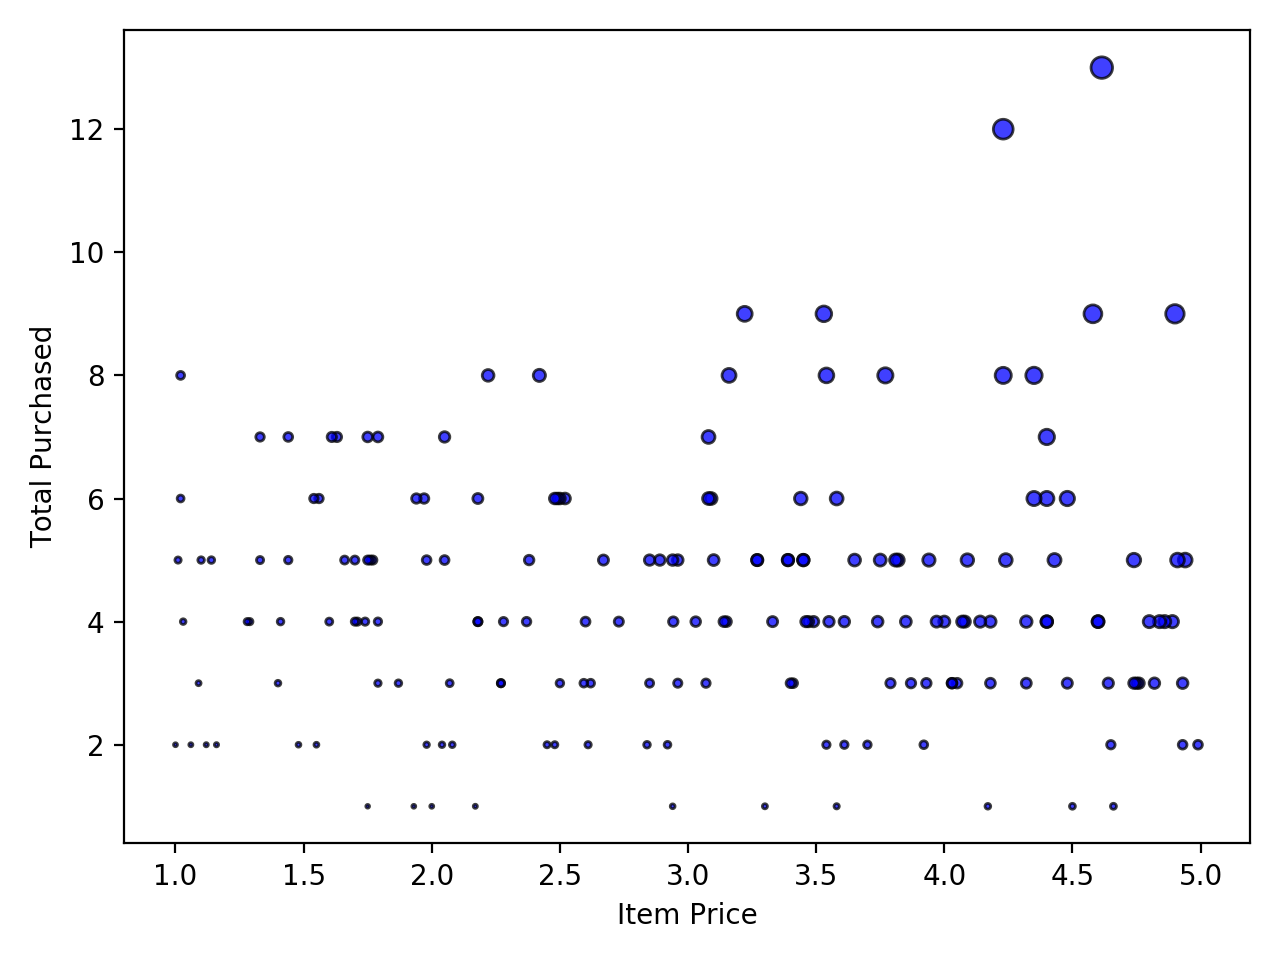

Text(0, 0.5, 'Total Purchased')

In [116]:
plt.scatter(x=graph_df["Item Price"],y=graph_df["Total Purchased"],s=graph_df["Total Purchase Value"],facecolors="blue",edgecolors="black",alpha=.75)
plt.xlabel("Item Price")
plt.ylabel("Total Purchased")

In [117]:
plt.tight_layout()
sts.pearsonr(graph_df["Item Price"],graph_df["Total Purchased"])
# (slope,intercept,rvalue,pvalue,stderr)=sts.linregress(graph_df["Item Price"],graph_df["Total Purchased"])
# lineeq = slope*graph_df["Item Price"] + intercept
# plt.plot(graph_df["Item Price"],lineeq,c="red")

(0.022831250168237435, 0.7616148666442305)

In [127]:
# agePurchaseData_df.reset_index(inplace=True)
# agePurchaseData_df.plot(kind="bar",x="age bins",y="Percent of Total Users",c="r",alpha=.5)
# agePurchaseData_df.plot(kind="bar",x="age bins",y="Percent of Total Purchases",c="b",alpha=.5)
# plt.show()

<IPython.core.display.Javascript object>


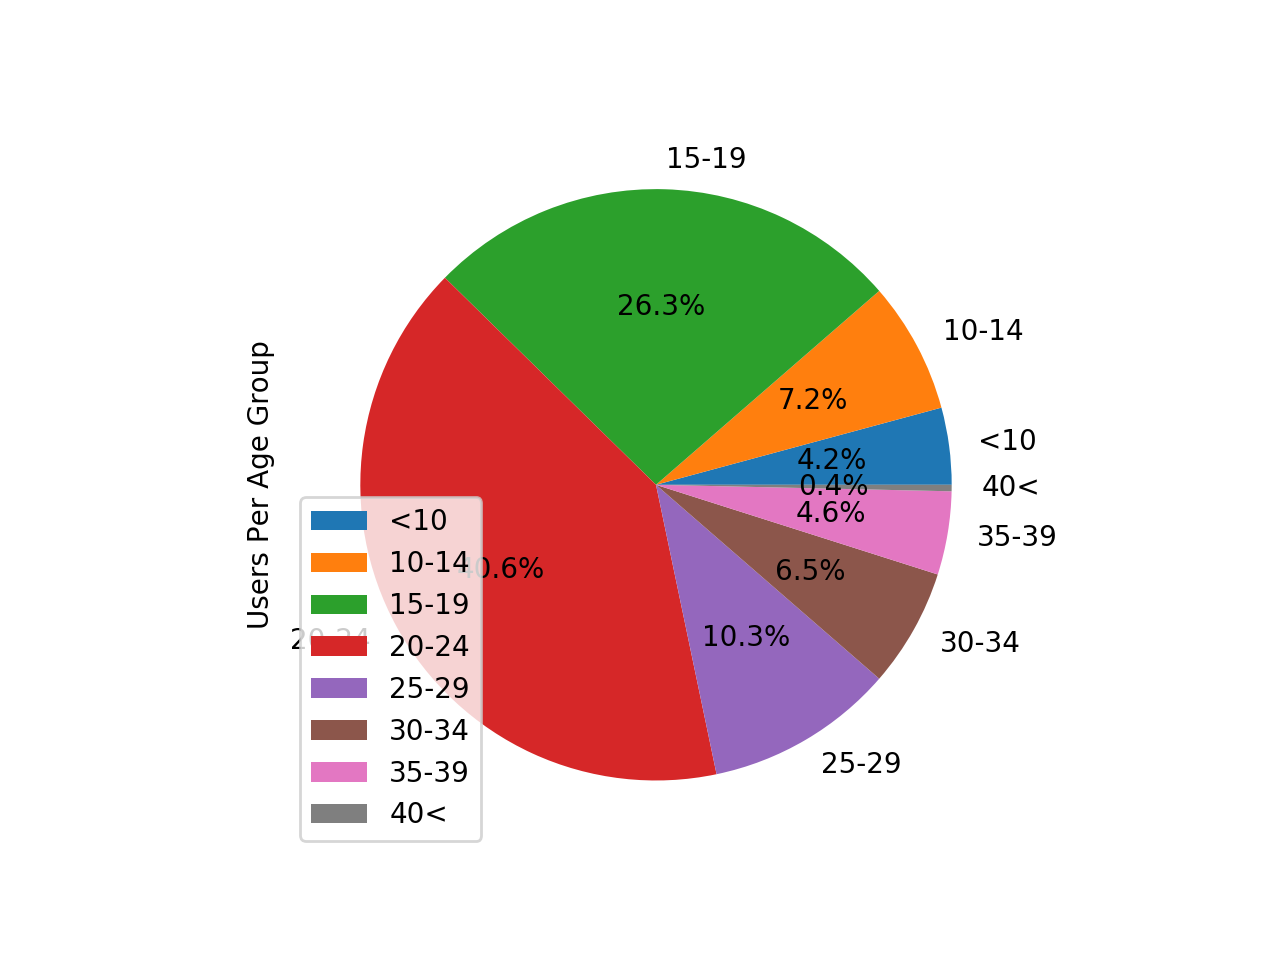

<IPython.core.display.Javascript object>


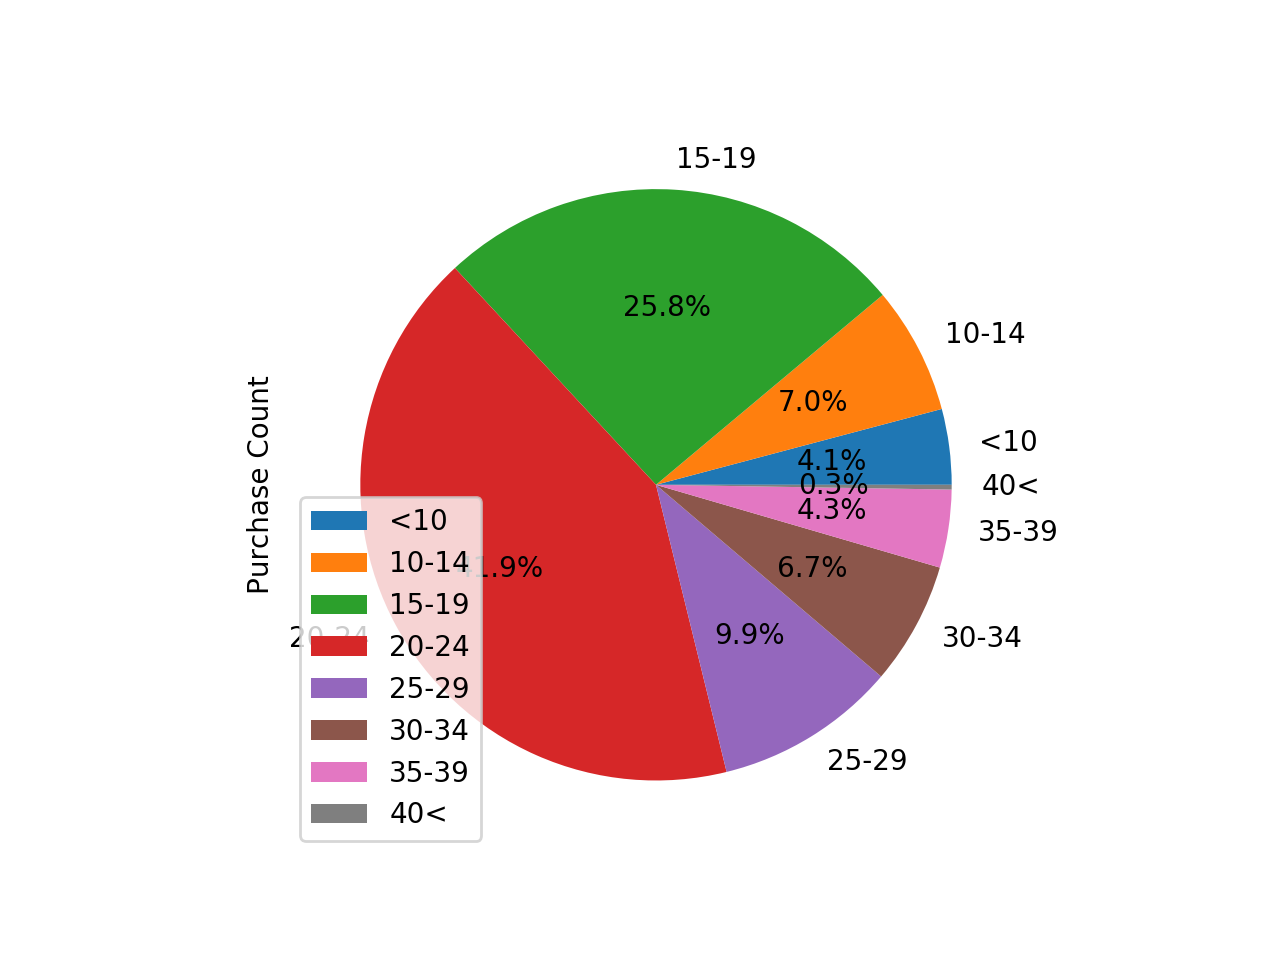

In [140]:
agePurchaseData_df.plot(kind="pie",y="Users Per Age Group",autopct="%1.1f%%",labels=agePurchaseData_df["age bins"])
agePurchaseData_df.plot(kind="pie",y="Purchase Count",autopct="%1.1f%%",labels=agePurchaseData_df["age bins"])

In [132]:
agePurchaseData_df.head(1)

,index,age bins,Users Per Age Group,Percent of Total Users,Purchase Count,Percent of Total Purchases,Average Amount Purchased,Total Purchase Value Per Group
0,0,<10,24,5.60%,32,4.13%,$3.40,$108.96
